In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\LOCMM_07062025_DATASET_VITAMINd.csv')

# # === Step 1: Create label from VitaminD ===
# def assign_label(x):
#     if pd.isna(x):
#         return None
#     elif x < 50:
#         return 0
#     elif x >= 50 and x < 125:
#         return 1
#     else:
#         return 2

# df_final['label'] = df_final['VitaminD'].apply(assign_label)

# === Bước 2: Trích năm đầu tiên từ chuỗi "2001-2002" ===
df_final['YearStart'] = df_final['YearID'].astype(str).str.extract(r'(\d{4})').astype(int)

def binary_vitamin_d_label(row):
    val = row['VitaminD']
    year = row['YearStart']

    if pd.isna(val) or pd.isna(year):
        return None  # hoặc np.nan

    if year in [2001, 2003]:
        return 1 if val < 20 else 0
    else:
        return 1 if val < 50 else 0

df_final['label'] = df_final.apply(binary_vitamin_d_label, axis=1)

# === Bước 3: Tách dữ liệu theo mốc năm 2013 ===
df_final_train = df_final[df_final['YearStart'] <= 2013]
df_final_test = df_final[df_final['YearStart'] > 2013]

# === Bước 4: Ghi ra file CSV ===
df_final_train.to_csv(r'c:\mydata\G8Vitamin\data\final\07062025\train.csv', index=False)
df_final_test.to_csv(r'c:\mydata\G8Vitamin\data\final\07062025\test.csv', index=False)

# === Log số dòng để xác nhận ===
print(f"✅ Số dòng train: {len(df_final_train)} được lưu vào train.csv")
print(f"✅ Số dòng test : {len(df_final_test)} được lưu vào test.csv")


✅ Số dòng train: 23838 được lưu vào train.csv
✅ Số dòng test : 6227 được lưu vào test.csv


In [3]:
# Read files train
df = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\07062025\train.csv')

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\2486612787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='viridis')


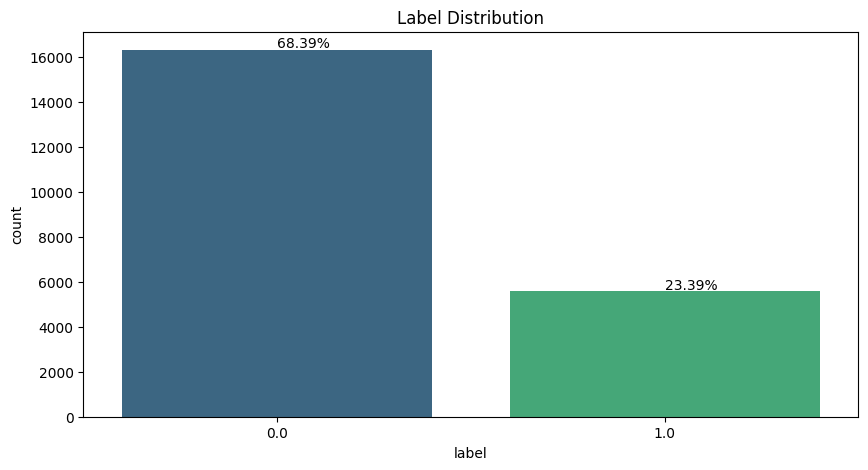

In [4]:
# Draw label distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label', data=df, palette='viridis')
plt.title('Label Distribution')
for i, rec in enumerate(ax.patches):
    ax.text(
        rec.get_x() + rec.get_width()/2,
        rec.get_height() + 100,
        f'{rec.get_height()/len(df)*100:.2f}%',
    )
plt.show()

### 1. Handle Missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23838 entries, 0 to 23837
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      23838 non-null  float64
 1   Gender                    23838 non-null  float64
 2   Age                       23838 non-null  float64
 3   Race                      23838 non-null  float64
 4   BMXWT                     23462 non-null  float64
 5   BMXHT                     23490 non-null  float64
 6   BMI                       23376 non-null  float64
 7   WaistCircumference        22722 non-null  float64
 8   FastingGlucose            22439 non-null  float64
 9   ALT                       22143 non-null  float64
 10  AST                       22140 non-null  float64
 11  AlkalinePhosphotase       22169 non-null  float64
 12  Cholesterol               22168 non-null  float64
 13  Triglycerides             22156 non-null  float64
 14  UricAc

In [6]:
# Drop columns not used fully
cols_drop = [
    "SEQN", "HBsAg", "Hba1c",
    "CreatinineUmol", 
]

df.drop(columns=cols_drop, inplace=True)

In [7]:
def check_missing_ratio(df_check):
    ratio_completeness = []
    for column in df_check.columns:
        completeness_ratio = df_check[column].notnull().sum() / len(df_check)
        ratio_completeness.append(completeness_ratio)

    # Draw ratio
    plt.figure(figsize=(20, 10)) # type: ignore
    plt.title("Completeness Ratio")
    ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')

    for i, rec in enumerate(ax.patches):
        ax.text(
            rec.get_x() + rec.get_width(),
            rec.get_y() + rec.get_height()/2,
            f'{ratio_completeness[i]:.2%}',
        )

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\1027853617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


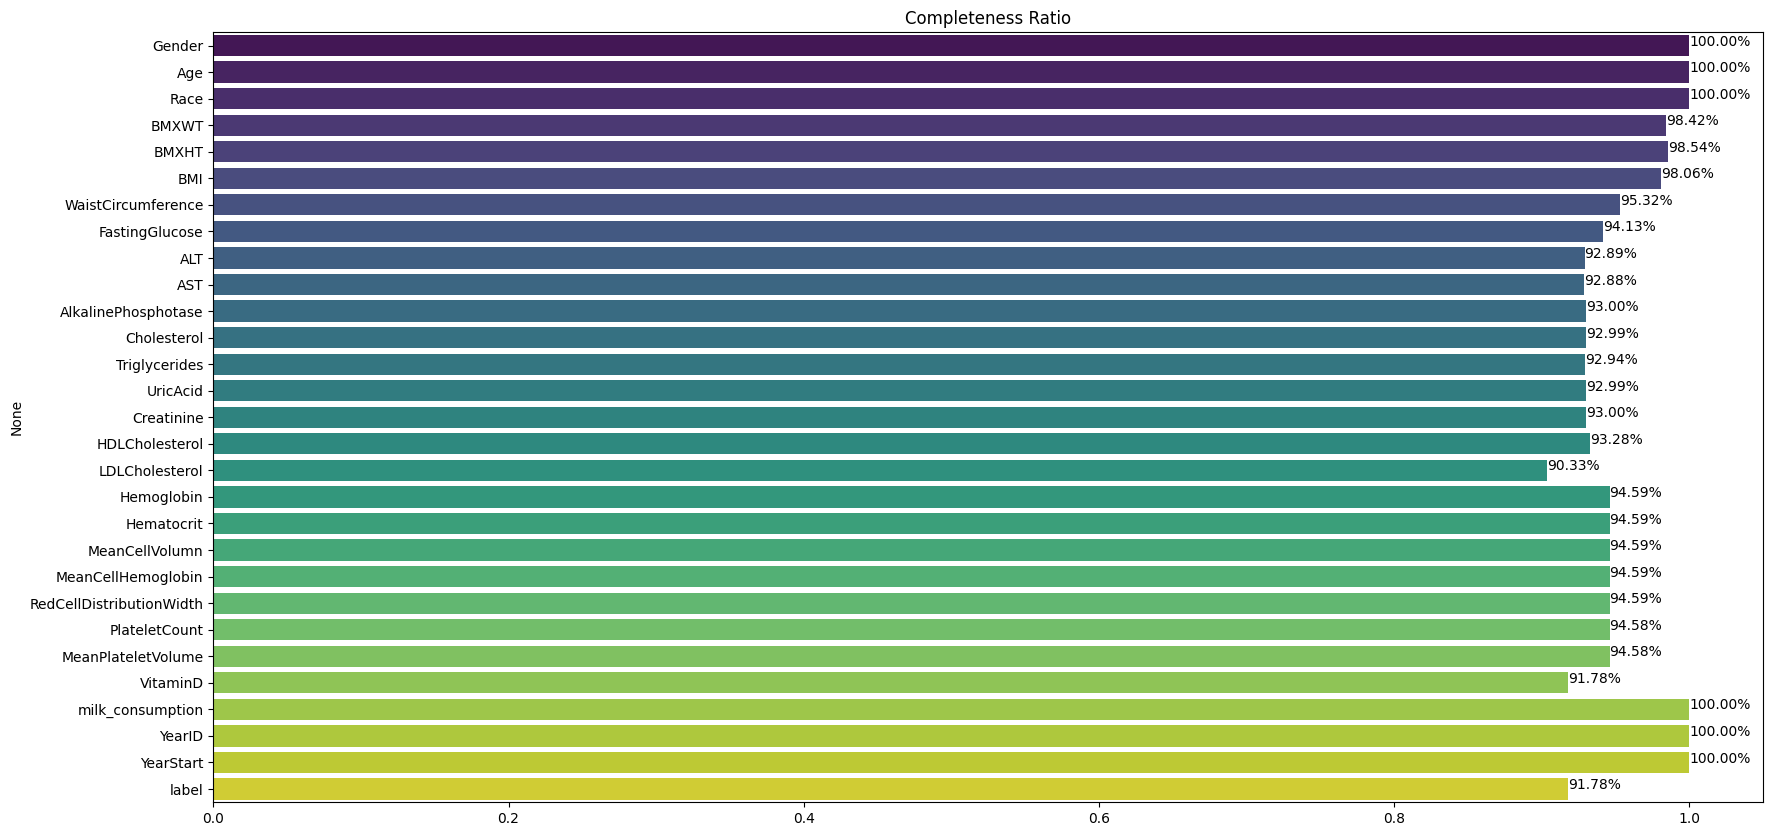

In [8]:
check_missing_ratio(df)

In [9]:
# Drop null vitamin D
df.dropna(subset=['VitaminD'], inplace=True)

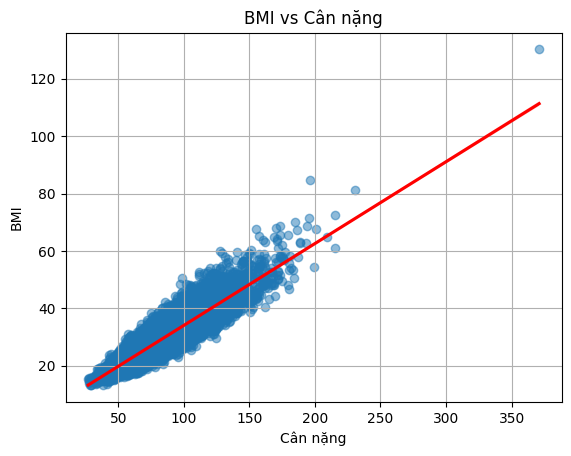

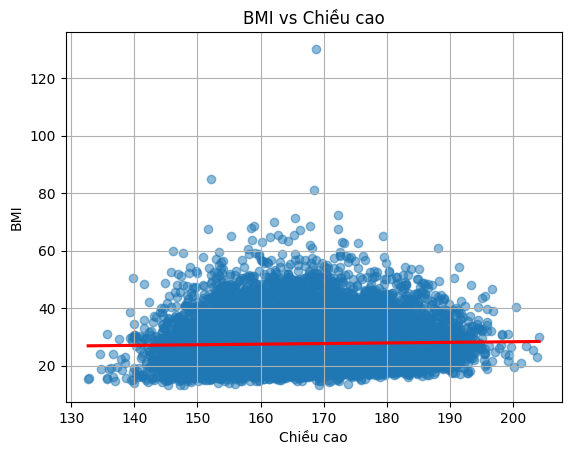

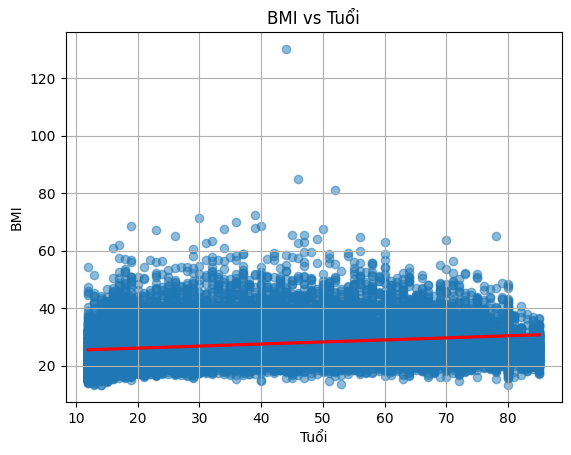

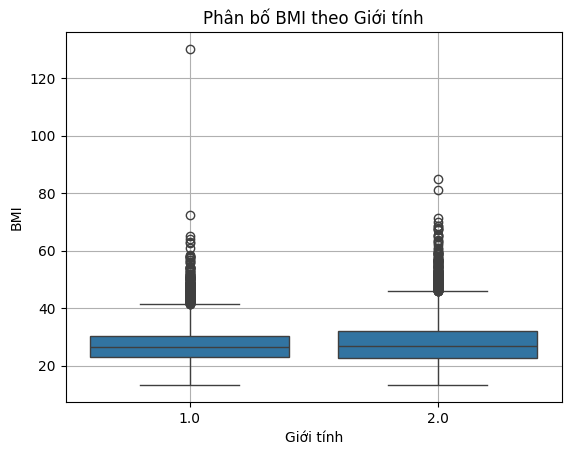

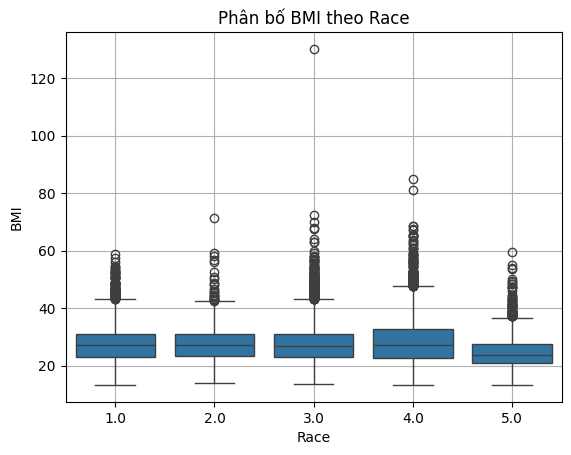

In [10]:
# Vòng eo vs BMI
sns.regplot(x='BMXWT', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('BMI vs Cân nặng')
plt.xlabel('Cân nặng')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Vòng eo vs BMI
sns.regplot(x='BMXHT', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('BMI vs Chiều cao')
plt.xlabel('Chiều cao')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Age vs BMI
if 'Age' in df.columns:
    sns.regplot(x='Age', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('BMI vs Tuổi')
    plt.xlabel('Tuổi')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

# Gender vs BMI
if 'Gender' in df.columns:
    sns.boxplot(x='Gender', y='BMI', data=df)
    plt.title('Phân bố BMI theo Giới tính')
    plt.xlabel('Giới tính')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

# Race vs BMI
if 'Race' in df.columns:
    sns.boxplot(x='Race', y='BMI', data=df)
    plt.title('Phân bố BMI theo Race')
    plt.xlabel('Race')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

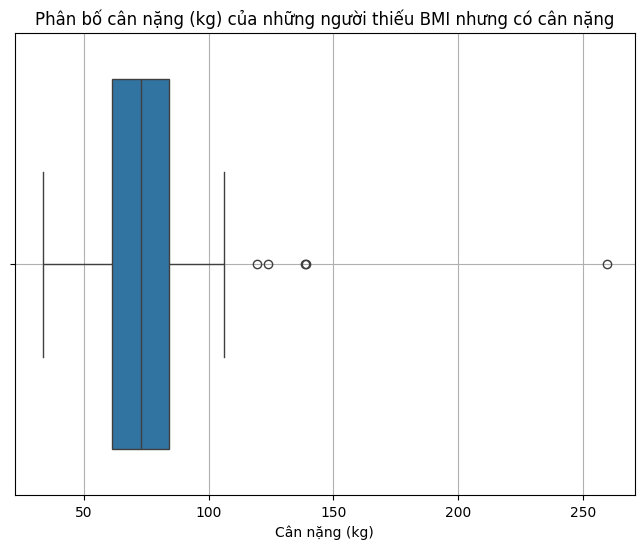

In [11]:
# Get row has not null weight but null BMI
missing_bmi_weights = df.loc[pd.isna(df['BMI']) & pd.notna(df['BMXWT']), 'BMXWT']

# Draw boxplot for missing BMI but has weight
plt.figure(figsize=(8, 6))
sns.boxplot(x=missing_bmi_weights)
plt.title('Phân bố cân nặng (kg) của những người thiếu BMI nhưng có cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.grid(True)
plt.show()

In [12]:
# calculate Q1, Q3 và IQR
Q1 = missing_bmi_weights.quantile(0.25)
Q3 = missing_bmi_weights.quantile(0.75)
IQR = Q3 - Q1

# lowwer_bound and upper_bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1 (25%): {Q1}')
print(f'Q3 (75%): {Q3}')
print(f'IQR: {IQR}')
print(f'Ngưỡng dưới (Lower bound): {lower_bound}')
print(f'Ngưỡng trên (Upper bound): {upper_bound}')

Q1 (25%): 61.150000000000006
Q3 (75%): 84.30000000000001
IQR: 23.150000000000006
Ngưỡng dưới (Lower bound): 26.424999999999997
Ngưỡng trên (Upper bound): 119.02500000000002


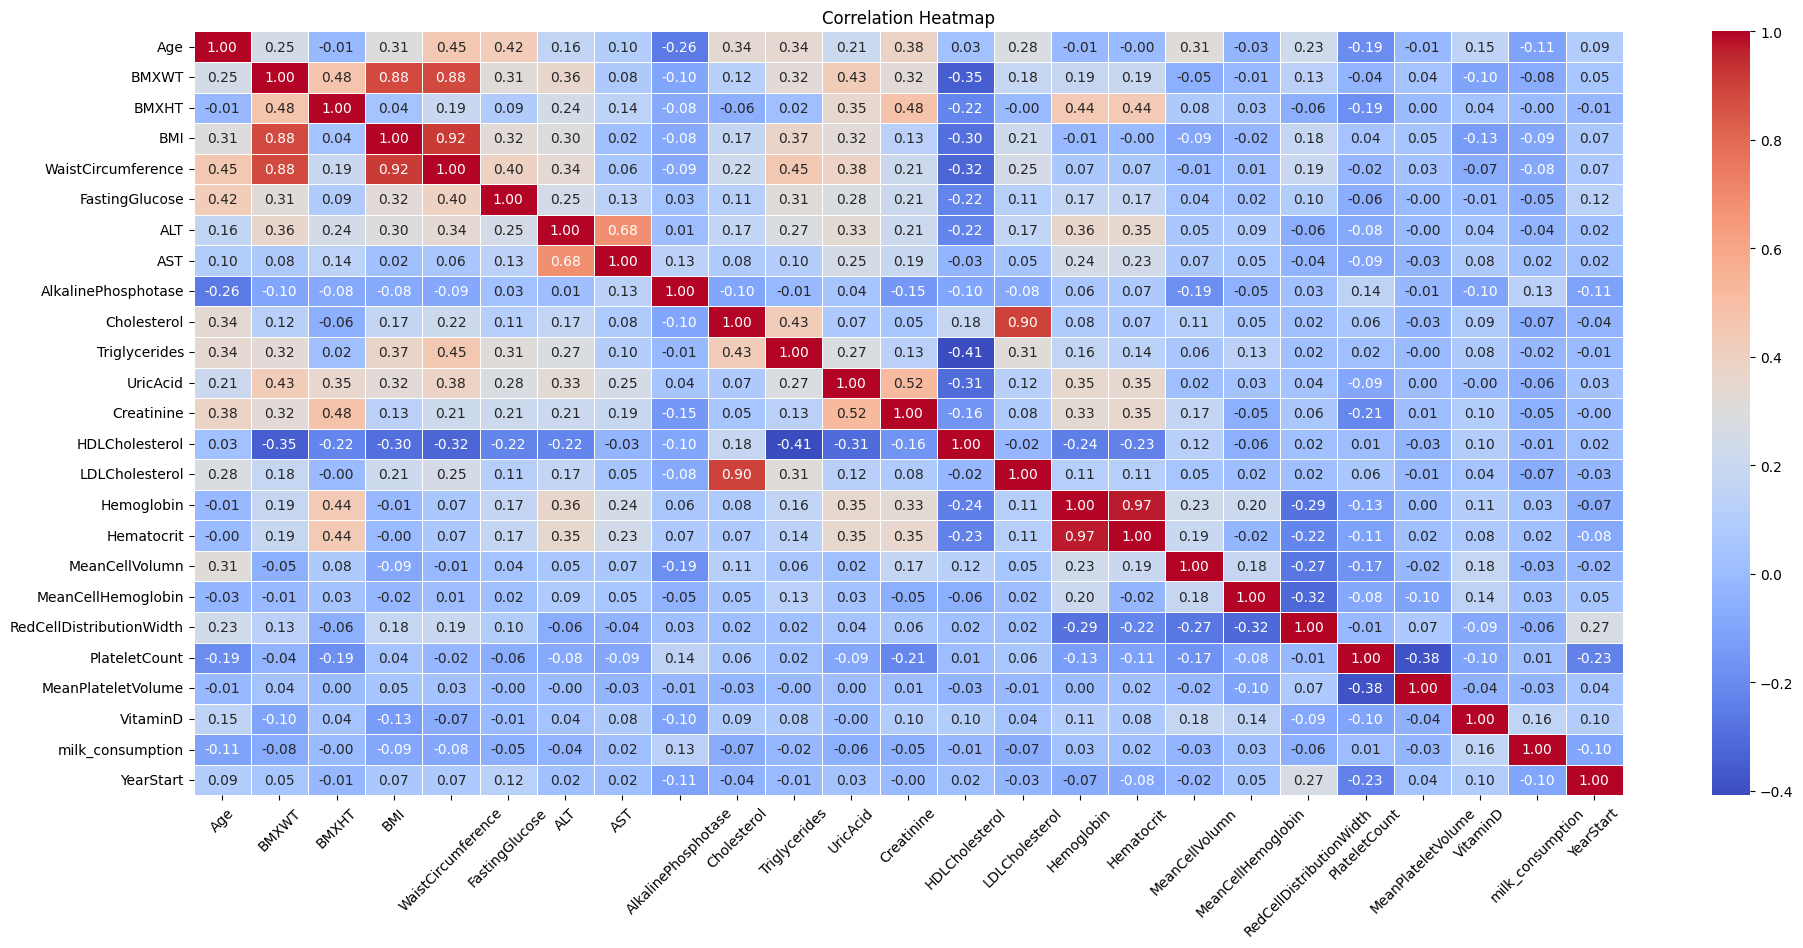

In [13]:
df_corr = df.copy()
df_corr.drop(columns=[
    "Gender", "Race", 
    "label", "YearID",
], inplace=True)

# Check consistency between columns with spearman correlation
correlation_matrix = df_corr.corr(method = "spearman")

plt.figure(figsize=(20, 10))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [14]:
# Imputation LDL cholesterol
for index, col in enumerate(['LDLCholesterol', 'HDLCholesterol', 'Triglycerides']):
    for i, row in df.iterrows():
        if pd.isnull(row[col]):
            TotalCholesterol = row['Cholesterol']
            a = ''
            b = ''
            c = 0
            if col == 'LDLCholesterol':
                a = row['HDLCholesterol']
                b = row['Triglycerides']
            elif col == 'HDLCholesterol':
                a = row['LDLCholesterol']
                b = row['Triglycerides']
            else:
                a = row['LDLCholesterol']
                b = row['HDLCholesterol']
            if pd.isnull(TotalCholesterol) or pd.isnull(a) or pd.isnull(b):
                    continue
            
            # Calculate LDL cholesterol using Friedewald formula
            if col == 'Triglycerides':
                c = (TotalCholesterol - a - b)*5
            else:
                c = TotalCholesterol - a - b/5
            df.loc[i, col] = c

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Filter rows for training
features_predict = ['WaistCircumference', 'Triglycerides', 'FastingGlucose', 'BMXWT']
feature_target = 'BMI'
df_train = df[features_predict + [feature_target]].dropna()

# Step 2: Input (X) và target (y)
X = df_train[features_predict]
y = df_train[feature_target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Đánh giá MSE
y_train_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_train_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 5: Predict missing BMI
df_predict = df[
    df[feature_target].isnull() &
    df[features_predict].notnull().all(axis=1)
]

df_predict_missing = scaler.transform(df_predict[features_predict])

# Step 6: Fill missing BMI
if not df_predict.empty:
    predicted_bmi = model.predict(df_predict_missing)
    df.loc[df_predict.index, feature_target] = predicted_bmi
    print(f"Filled {len(df_predict)} missing BMI values.")
else:
    print("No eligible missing BMI values to fill.")


Mean Squared Error (MSE): 6.2810
Filled 54 missing BMI values.


C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\1027853617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


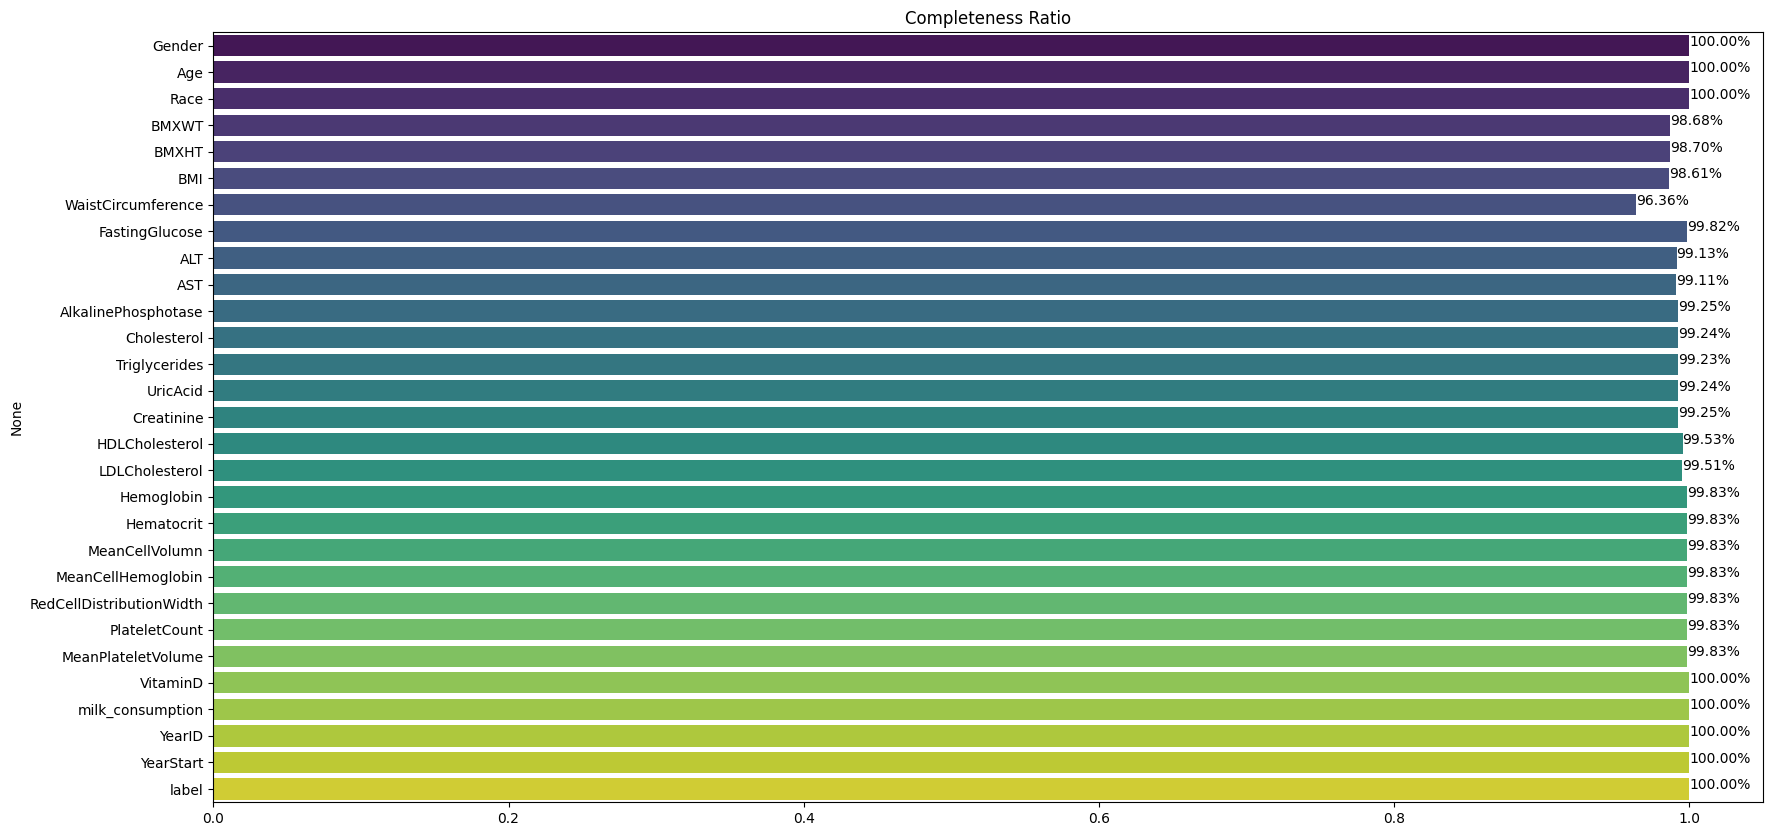

In [16]:
check_missing_ratio(df)

In [17]:
columns_list = df.columns.tolist()

# remove WaistCircumference from columns_list
if 'WaistCircumference' in columns_list:
    columns_list.remove('WaistCircumference')

# drop null values
df.dropna(subset=columns_list, inplace=True)


### 2. Handle outlier

In [18]:
# Create dict to convert rate to measure
measures_dict = {
    "BMI": { # kg/m^2
        "both":{
            "1": 18.4, # <18.4
            "2": 24.9, # 18.4 <= x < 24.9
            "3": 30, # 24.9 <= x < 30
            "4": 30 # >= 30
        }
    },

    "WaistCircumference": {  # cm
        "male":{
            "1": 94, # <94
            "2": 102, # 94 <= x < 102
            "3": 102, # >= 102
        }, 
        "female": {
            "1": 80, # <80
            "2": 88, # 80 <= x < 88
            "3": 88 # >= 88
        }
    },

    "HDLCholesterol": { # mg/dl
        "both":{
            "1": 40, # <40
            "2": 60, # 40 <= x < 60
            "3": 60 # >= 60
        }  
    },

    "Triglycerides":{ # mg/dl
        "both":{
            "1": 150, # <150
            "2": 200, # 150 <= x < 200
            "3": 200, # >= 200
        }
    },

    "LDLCholesterol": { # mg/dl
        "both":{
            "1": 100, # <100
            "2": 160, # 100 <= x < 160
            "3": 160 # >= 160
        }
    },

    "Hba1c": { # %
        "both":{
            "1": 5.7, # <5.7
            "2": 6.5, # 5.7 <= x < 6.5
            "3": 6.5 # >= 6.5
        }
    },

    "ALT": { # U/L
        "male": {
            "1": 0, # <0
            "2": 41, # 0 <= x < 41
            "3": 41 # >= 41
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 31
        }
    },

    "AST": {  # U/L
        "male": {
            "1": 0, # <0
            "2": 38, # 0 <= x < 38
            "3": 38 # >= 40
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 32
        }
    },

    "AlkalinePhosphotase":{ # U/L
        "male": {
            "1": 40, # < 40
            "2": 130, # 40 <= x < 130
            "3": 130 # >= 130
        },
        "female":{
            "1": 35, # < 35
            "2": 105, # 35 <= x < 105
            "3": 105 # >= 105
        }
    },

    "Creatinine":{  # mg/dl
        "male": {
            "1": 0.67, # <0.67
            "2": 1.18, # 0.67 <= x < 1.18,
            "3": 1.18 # >= 1.18
        },
        "female":{
            "1": 0.51, # < 0.51
            "2": 0.96, # 0.51 <= x < 0.96
            "3": 0.96 # >= 0.96
        }
    },
    
    "UricAcid": { # mng/dl
        "male": {
            "1": 3.4, # <3.4
            "2": 7.1, # 3.4 <= x < 7.1
            "3": 7.1 # >= 7.1
        }, 

        "female": {
            "1": 2.4, # < 2.4
            "2": 5.8, # 2.4 <= x < 5.8
            "3": 5.8 # >= 5.8
        }
    }
}

In [19]:
col_blood_dict = {
    "Hemoglobin": {
        "min": 10.7,
        "max": 17.1
    },
    "Hematocrit": {
        "min": 32.1,
        "max": 50.9
    },
    "MeanCellVolumn": {
        "min": 68.2,
        "max": 102.7
    },
    "MeanCellHemoglobin": {
        "min": 22.3,
        "max": 35
    },
    "RedCellDistributionWidth": {
        "min": 11.4,
        "max": 16.2
    },
    "PlateletCount": {
        "min": 155,
        "max": 547
    },
    "MeanPlateletVolume": {
        "min": 6.1,
        "max": 10.2
    }
}

In [20]:
# Drop outlier value
'''
   Strategy to check outlier:
    1. Use boxplot to visualize outliers
    2. Use Z-score to detect outliers
      2.1 If Z-score > 3 and greater than max normal range value => outlier
    3. Measure Consistency ratio
'''
          
def check_and_drop_outlier(df_check):
    df_dq = df_check.copy()
    for col in df_dq.columns:
        if col in measures_dict.keys():
          # Calculate Z-score of column
          z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
          max_value = 0
          min_value = 0
          if measures_dict[col].get("both"):
            # get max value and min value
            max_value = max(measures_dict[col]["both"].values())
            min_value = min(measures_dict[col]["both"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))
            
            df_dq = df_dq[~outlier_condition]
            print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
          else:
            num_invalid_range = 0

            if measures_dict[col].get("female"):
              # get max value and min value
              max_value = max(measures_dict[col]["female"].values())
              min_value = min(measures_dict[col]["female"].values())

              # check outlier
              outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 2)

              num_invalid_range += outlier_condition.sum()

              df_dq = df_dq[~outlier_condition]

            if measures_dict[col].get("male"):
              # get max value and min value
              max_value = max(measures_dict[col]["male"].values())
              min_value = min(measures_dict[col]["male"].values())

              # check outlier
              outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 1)

              num_invalid_range += outlier_condition.sum()
              
              df_dq = df_dq[~outlier_condition]

            print(f"Ratio of outlier for {col}: {num_invalid_range/len(df_dq):.2%}")
          
        elif col in col_blood_dict:
          # Check outlier for blood columns
          z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
          max_value = col_blood_dict[col].get("max")
          min_value = col_blood_dict[col].get("min")

          # check outlier
          outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))

          df_dq = df_dq[~outlier_condition]

          print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
        
    return df_dq

In [21]:
df = check_and_drop_outlier(df)

Ratio of outlier for BMI: 1.24%
Ratio of outlier for WaistCircumference: 0.25%
Ratio of outlier for ALT: 0.81%
Ratio of outlier for AST: 1.35%
Ratio of outlier for AlkalinePhosphotase: 3.07%
Ratio of outlier for Triglycerides: 1.34%
Ratio of outlier for UricAcid: 0.59%
Ratio of outlier for Creatinine: 0.62%
Ratio of outlier for HDLCholesterol: 0.96%
Ratio of outlier for LDLCholesterol: 0.69%
Ratio of outlier for Hemoglobin: 0.67%
Ratio of outlier for Hematocrit: 0.05%
Ratio of outlier for MeanCellVolumn: 0.54%
Ratio of outlier for MeanCellHemoglobin: 0.20%
Ratio of outlier for RedCellDistributionWidth: 1.43%
Ratio of outlier for PlateletCount: 0.13%
Ratio of outlier for MeanPlateletVolume: 0.81%


C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_33480\3256179280.py:53: Us

### 3. Feature Engineering & Feature Selection

In [22]:
# One hot encoding for race column
df['Race'].value_counts()

Race
3.0    8080
4.0    3786
1.0    3681
5.0    1423
2.0    1379
Name: count, dtype: int64

In [23]:
df['Race'] = df['Race'].apply(lambda x: 1 if x == 2 else x) # group 1 and 2

# Get dummies for Race
df = pd.get_dummies(df, columns=["Race"], prefix="Race")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18349 entries, 0 to 23837
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    18349 non-null  float64
 1   Age                       18349 non-null  float64
 2   Race                      18349 non-null  float64
 3   BMXWT                     18349 non-null  float64
 4   BMXHT                     18349 non-null  float64
 5   BMI                       18349 non-null  float64
 6   WaistCircumference        17943 non-null  float64
 7   FastingGlucose            18349 non-null  float64
 8   ALT                       18349 non-null  float64
 9   AST                       18349 non-null  float64
 10  AlkalinePhosphotase       18349 non-null  float64
 11  Cholesterol               18349 non-null  float64
 12  Triglycerides             18349 non-null  float64
 13  UricAcid                  18349 non-null  float64
 14  Creatinine 

In [24]:
df.columns

Index(['Gender', 'Age', 'Race', 'BMXWT', 'BMXHT', 'BMI', 'WaistCircumference',
       'FastingGlucose', 'ALT', 'AST', 'AlkalinePhosphotase', 'Cholesterol',
       'Triglycerides', 'UricAcid', 'Creatinine', 'HDLCholesterol',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'VitaminD', 'milk_consumption', 'YearID',
       'YearStart', 'label'],
      dtype='object')

In [25]:
df.dropna(inplace=True)

c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:21:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


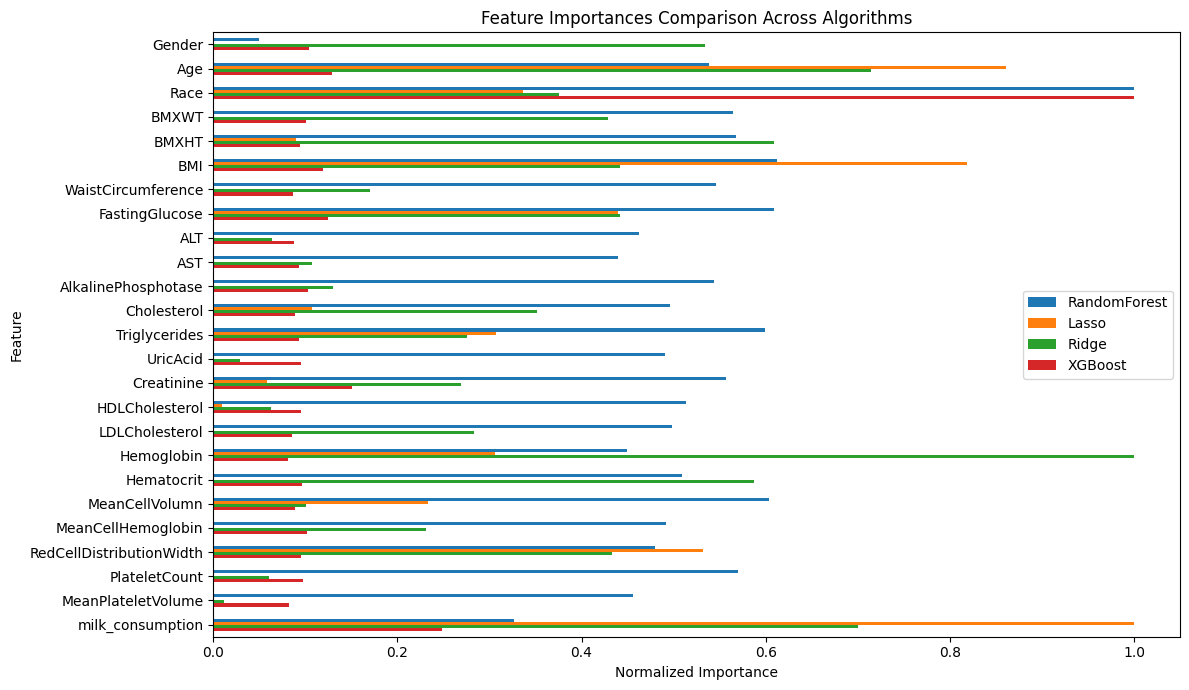

                     Feature  RandomForest     Lasso     Ridge   XGBoost
2                       Race      1.000000  0.336839  0.375857  1.000000
5                        BMI      0.611994  0.818348  0.442279  0.119668
7             FastingGlucose      0.609317  0.440032  0.442125  0.124685
19            MeanCellVolumn      0.603992  0.233460  0.100730  0.088585
12             Triglycerides      0.599454  0.307333  0.275644  0.093152
22             PlateletCount      0.569937  0.000000  0.060993  0.097085
4                      BMXHT      0.567574  0.089913  0.608868  0.094062
3                      BMXWT      0.564553  0.000000  0.428830  0.100814
14                Creatinine      0.556835  0.058315  0.268560  0.150949
6         WaistCircumference      0.546348  0.000000  0.170327  0.086088
10       AlkalinePhosphotase      0.543753  0.000000  0.130092  0.102349
1                        Age      0.538938  0.860867  0.714836  0.129350
15            HDLCholesterol      0.513030  0.00992

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt

# Load dataset

X = df.drop(columns=['label', 'YearStart', 'YearID', 'VitaminD'])  # Drop non-features
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standardize for linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# 2. Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y_train)
lasso_importance = np.abs(lasso.coef_)

# 3. Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y_train)
ridge_importance = np.abs(ridge.coef_)

# 4. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_importance = xgb_model.feature_importances_

# Aggregate results into a DataFrame
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importance,
    'Lasso': lasso_importance,
    'Ridge': ridge_importance,
    'XGBoost': xgb_importance
})

# Normalize for visualization
for col in ['RandomForest', 'Lasso', 'Ridge', 'XGBoost']:
    importance_df[col] = importance_df[col] / importance_df[col].max()

# Plot top 10 features by Random Forest
top_features = importance_df.sort_values(by='RandomForest', ascending=False).head(30)['Feature']

importance_df_top = importance_df[importance_df['Feature'].isin(top_features)]

importance_df_top.set_index('Feature').plot(kind='barh', figsize=(12, 7))
plt.title("Feature Importances Comparison Across Algorithms")
plt.xlabel("Normalized Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print all results
print(importance_df.sort_values(by='RandomForest', ascending=False).head(30))


In [27]:
df.drop(columns=['Cholesterol', 'BMXWT', 'BMXHT', "YearID"], inplace=True)

# save to csv
df.to_csv(r'c:\mydata\G8Vitamin\data\final\07062025\processed_train.csv', index=False)

In [28]:
df.columns

Index(['Gender', 'Age', 'Race', 'BMI', 'WaistCircumference', 'FastingGlucose',
       'ALT', 'AST', 'AlkalinePhosphotase', 'Triglycerides', 'UricAcid',
       'Creatinine', 'HDLCholesterol', 'LDLCholesterol', 'Hemoglobin',
       'Hematocrit', 'MeanCellVolumn', 'MeanCellHemoglobin',
       'RedCellDistributionWidth', 'PlateletCount', 'MeanPlateletVolume',
       'VitaminD', 'milk_consumption', 'YearStart', 'label'],
      dtype='object')

## Simple test preparation

In [29]:
df1 = df_final_test.copy()

In [30]:
remove_columns = ['Cholesterol', 'BMXWT', 'BMXHT', "YearID","HBsAg"]
df1.drop(columns = remove_columns,inplace=True)

In [32]:
df1['Race'] = df1['Race'].apply(lambda x: 1 if x == 2 else x) # group 1 and 2

# Get dummies for Race
df1 = pd.get_dummies(df1, columns=["Race"], prefix="Race")

In [31]:
df1.dropna(inplace=True)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5214 entries, 23838 to 30064
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5214 non-null   float64
 1   Gender                    5214 non-null   float64
 2   Age                       5214 non-null   float64
 3   Race                      5214 non-null   float64
 4   BMI                       5214 non-null   float64
 5   WaistCircumference        5214 non-null   float64
 6   FastingGlucose            5214 non-null   float64
 7   ALT                       5214 non-null   float64
 8   AST                       5214 non-null   float64
 9   AlkalinePhosphotase       5214 non-null   float64
 10  Triglycerides             5214 non-null   float64
 11  UricAcid                  5214 non-null   float64
 12  Creatinine                5214 non-null   float64
 13  CreatinineUmol            5214 non-null   float64
 14  HDLChole

In [33]:
df1.to_csv(r'c:\mydata\G8Vitamin\data\final\07062025\processed_test.csv', index=False)